<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Wild_Blueberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, TweedieRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
#loading the data
wild_blueberry = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
wild_blueberry.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
wild_blueberry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [5]:
#sum of null values
wild_blueberry.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [6]:
#Drop Row#
wild_blueberry.drop('Row#', axis=1, inplace=True)

In [7]:
#checking columns
wild_blueberry.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

## DATA ANALYSIS

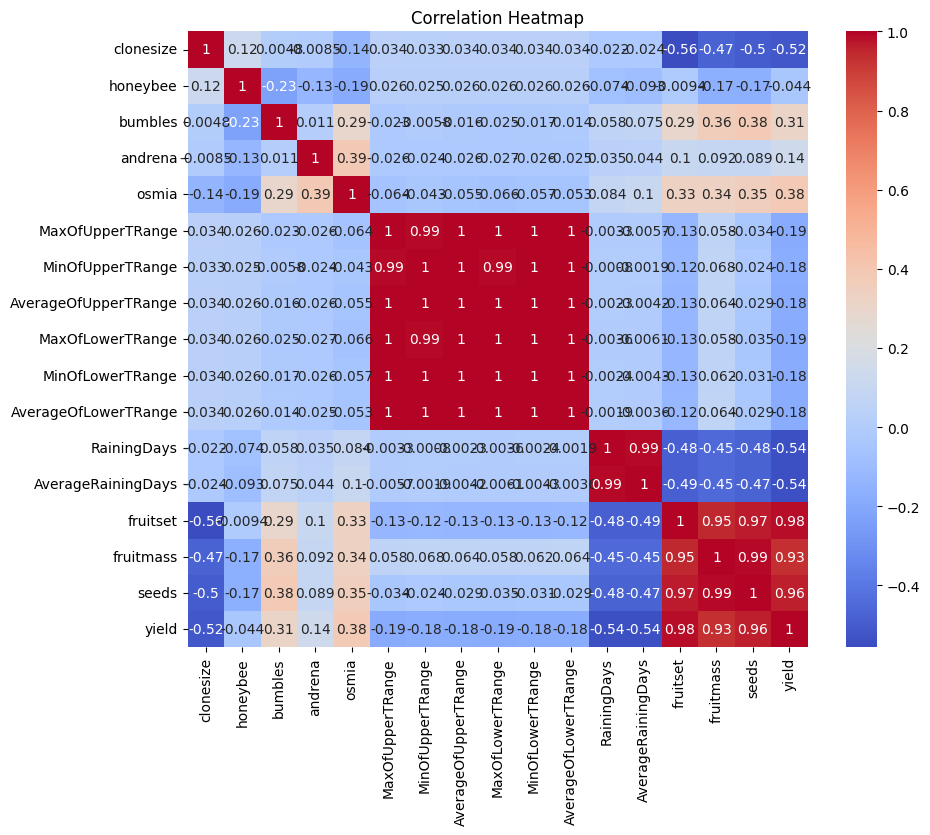

In [8]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wild_blueberry.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Drop the features based on correlation
features_to_drop = [
     'MinOfUpperTRange', 'AverageOfUpperTRange',
     'MinOfLowerTRange', 'AverageOfLowerTRange',
    'honeybee', 'bumbles', 'RainingDays', 'AverageRainingDays',
    'fruitmass', 'seeds'
]

# Dropping the selected features
wild_blueberry_cleaned = wild_blueberry.drop(columns=features_to_drop)

# Show the cleaned dataset
print(wild_blueberry_cleaned.head())

   clonesize  andrena  osmia  MaxOfUpperTRange  MaxOfLowerTRange  fruitset  \
0       37.5     0.25   0.25              86.0              62.0  0.410652   
1       37.5     0.25   0.25              86.0              62.0  0.444254   
2       37.5     0.25   0.25              94.6              68.2  0.383787   
3       37.5     0.25   0.25              94.6              68.2  0.407564   
4       37.5     0.25   0.25              86.0              62.0  0.354413   

         yield  
0  3813.165795  
1  4947.605663  
2  3866.798965  
3  4303.943030  
4  3436.493543  


In [12]:
wild_blueberry_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clonesize         777 non-null    float64
 1   andrena           777 non-null    float64
 2   osmia             777 non-null    float64
 3   MaxOfUpperTRange  777 non-null    float64
 4   MaxOfLowerTRange  777 non-null    float64
 5   fruitset          777 non-null    float64
 6   yield             777 non-null    float64
dtypes: float64(7)
memory usage: 42.6 KB


In [13]:
#save cleaned copy
wild_blueberry_cleaned.to_csv('wild_blueberry_cleaned.csv', index=False)

## MODELLING

### Linear Regression

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
X = wild_blueberry.drop(columns=['yield'])
y = wild_blueberry['yield']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = pipeline.predict(X_val)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 97.74131690079476


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_train_pred = pipeline.predict(X_train)

# Predict on the validation (testing) set
y_val_pred = pipeline.predict(X_val)

# Calculate metrics for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for the validation (testing) set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the results
print("Training Set Metrics:")
print(f"  Mean Absolute Error (MAE): {train_mae}")
print(f"  Mean Squared Error (MSE): {train_mse}")
print(f"  R-squared (R2): {train_r2}")

print("\nValidation (Testing) Set Metrics:")
print(f"  Mean Absolute Error (MAE): {val_mae}")
print(f"  Mean Squared Error (MSE): {val_mse}")
print(f"  R-squared (R2): {val_r2}")

Training Set Metrics:
  Mean Absolute Error (MAE): 91.52290644511618
  Mean Squared Error (MSE): 14856.013716745647
  R-squared (R2): 0.9917747912299896

Validation (Testing) Set Metrics:
  Mean Absolute Error (MAE): 97.74131690079476
  Mean Squared Error (MSE): 16819.250441222703
  R-squared (R2): 0.991346465006401


### Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data with the new features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the linear model with polynomial features
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train_poly)

# Predict and evaluate for training data
y_train_pred_poly = linear_model_poly.predict(X_train_poly)
mse_train_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
r2_train_poly = r2_score(y_train_poly, y_train_pred_poly)

# Predict and evaluate for testing data
y_test_pred_poly = linear_model_poly.predict(X_test_poly)
mse_test_poly = mean_squared_error(y_test_poly, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test_poly, y_test_pred_poly)
r2_test_poly = r2_score(y_test_poly, y_test_pred_poly)

# Print the training results
print("Training Results:")
print(f"Polynomial Regression MSE (Train): {mse_train_poly:.4f}")
print(f"Polynomial Regression MAE (Train): {mae_train_poly:.4f}")
print(f"Polynomial Regression R^2 (Train): {r2_train_poly:.4f}")

# Print the testing results
print("\nTesting Results:")
print(f"Polynomial Regression MSE (Test): {mse_test_poly:.4f}")
print(f"Polynomial Regression MAE (Test): {mae_test_poly:.4f}")
print(f"Polynomial Regression R^2 (Test): {r2_test_poly:.4f}")

Training Results:
Polynomial Regression MSE (Train): 35518.8678
Polynomial Regression MAE (Train): 143.0786
Polynomial Regression R^2 (Train): 0.9803

Testing Results:
Polynomial Regression MSE (Test): 240126566490222062731264.0000
Polynomial Regression MAE (Test): 39233568224.0176
Polynomial Regression R^2 (Test): -123545555925788512.0000


### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data with the new features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Ridge regression model with polynomial features
ridge_model_poly = Ridge(alpha=0.5)
ridge_model_poly.fit(X_train_poly, y_train_poly)

# Predict and evaluate for training data
y_train_pred_poly = ridge_model_poly.predict(X_train_poly)
mse_train_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
r2_train_poly = r2_score(y_train_poly, y_train_pred_poly)

# Predict and evaluate for testing data
y_test_pred_poly = ridge_model_poly.predict(X_test_poly)
mse_test_poly = mean_squared_error(y_test_poly, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test_poly, y_test_pred_poly)
r2_test_poly = r2_score(y_test_poly, y_test_pred_poly)

# Print the training results
print("Training Results with Ridge Regression:")
print(f"Ridge Regression MSE (Train): {mse_train_poly:.4f}")
print(f"Ridge Regression MAE (Train): {mae_train_poly:.4f}")
print(f"Ridge Regression R^2 (Train): {r2_train_poly:.4f}")

# Print the testing results
print("\nTesting Results with Ridge Regression:")
print(f"Ridge Regression MSE (Test): {mse_test_poly:.4f}")
print(f"Ridge Regression MAE (Test): {mae_test_poly:.4f}")
print(f"Ridge Regression R^2 (Test): {r2_test_poly:.4f}")

Training Results with Ridge Regression:
Ridge Regression MSE (Train): 10810.9035
Ridge Regression MAE (Train): 79.1047
Ridge Regression R^2 (Train): 0.9940

Testing Results with Ridge Regression:
Ridge Regression MSE (Test): 18484.4827
Ridge Regression MAE (Test): 92.7680
Ridge Regression R^2 (Test): 0.9905


### Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data with the new features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Lasso regression model with polynomial features
lasso_model_poly = Lasso(alpha=0.1, max_iter=10000)  # Increased max_iter to ensure convergence
lasso_model_poly.fit(X_train_poly, y_train_poly)

# Predict and evaluate for training data
y_train_pred_poly = lasso_model_poly.predict(X_train_poly)
mse_train_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
r2_train_poly = r2_score(y_train_poly, y_train_pred_poly)

# Predict and evaluate for testing data
y_test_pred_poly = lasso_model_poly.predict(X_test_poly)
mse_test_poly = mean_squared_error(y_test_poly, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test_poly, y_test_pred_poly)
r2_test_poly = r2_score(y_test_poly, y_test_pred_poly)

# Print the training results
print("Training Results with Lasso Regression:")
print(f"Lasso Regression MSE (Train): {mse_train_poly:.4f}")
print(f"Lasso Regression MAE (Train): {mae_train_poly:.4f}")
print(f"Lasso Regression R^2 (Train): {r2_train_poly:.4f}")

# Print the testing results
print("\nTesting Results with Lasso Regression:")
print(f"Lasso Regression MSE (Test): {mse_test_poly:.4f}")
print(f"Lasso Regression MAE (Test): {mae_test_poly:.4f}")
print(f"Lasso Regression R^2 (Test): {r2_test_poly:.4f}")

Training Results with Lasso Regression:
Lasso Regression MSE (Train): 10830.3943
Lasso Regression MAE (Train): 79.2164
Lasso Regression R^2 (Train): 0.9940

Testing Results with Lasso Regression:
Lasso Regression MSE (Test): 11828.8547
Lasso Regression MAE (Test): 86.1190
Lasso Regression R^2 (Test): 0.9939


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.456e+06, tolerance: 1.122e+05
  model = cd_fast.enet_coordinate_descent(


### Elastic Net Regression

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data with the new features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Elastic Net regression model with polynomial features
elastic_net_model_poly = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)  # l1_ratio=0.5 balances L1 and L2 penalties
elastic_net_model_poly.fit(X_train_poly, y_train_poly)

# Predict and evaluate for training data
y_train_pred_poly = elastic_net_model_poly.predict(X_train_poly)
mse_train_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
r2_train_poly = r2_score(y_train_poly, y_train_pred_poly)

# Predict and evaluate for testing data
y_test_pred_poly = elastic_net_model_poly.predict(X_test_poly)
mse_test_poly = mean_squared_error(y_test_poly, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test_poly, y_test_pred_poly)
r2_test_poly = r2_score(y_test_poly, y_test_pred_poly)

# Print the training results
print("Training Results with Elastic Net Regression:")
print(f"Elastic Net Regression MSE (Train): {mse_train_poly:.4f}")
print(f"Elastic Net Regression MAE (Train): {mae_train_poly:.4f}")
print(f"Elastic Net Regression R^2 (Train): {r2_train_poly:.4f}")

# Print the testing results
print("\nTesting Results with Elastic Net Regression:")
print(f"Elastic Net Regression MSE (Test): {mse_test_poly:.4f}")
print(f"Elastic Net Regression MAE (Test): {mae_test_poly:.4f}")
print(f"Elastic Net Regression R^2 (Test): {r2_test_poly:.4f}")

Training Results with Elastic Net Regression:
Elastic Net Regression MSE (Train): 12240.9885
Elastic Net Regression MAE (Train): 84.7095
Elastic Net Regression R^2 (Train): 0.9932

Testing Results with Elastic Net Regression:
Elastic Net Regression MSE (Test): 13664.4041
Elastic Net Regression MAE (Test): 90.1764
Elastic Net Regression R^2 (Test): 0.9930


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.102e+06, tolerance: 1.122e+05
  model = cd_fast.enet_coordinate_descent(
